In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
correc_df = pd.read_csv('tabla_correccion.csv')
tabla = correc_df.values
sujetos = pd.read_csv('tabla_encuesta_asertividad.csv')
percentil = pd.read_csv('tabla_percentil.csv')
percentil.head()
percentil_v = pd.read_csv('tabla_percentil_varon.csv')
percentil_v.tail()
percentil_m = pd.read_csv('tabla_percentil_mujer.csv')
sujetos.tail()


,niño1,niño2,niña3,niña4,niña5,niño6,niña7,niña8,niño9,niña10
22,e,b,d,d,d,d,d,d,e,d
23,a,a,e,e,e,e,c,e,a,c
24,a,b,b,d,d,d,d,e,c,d
25,b,b,e,b,b,b,a,a,e,a
26,d,b,b,c,c,a,a,a,d,a


In [17]:



columna = 0
suj = []
lista = []
numerico = pd.DataFrame(columns=sujetos.columns)
print(numerico)

for column in sujetos.columns[:]:
 
    fila = 0
    for items in sujetos[column]:
        
        #print (items)
        match (items):
            case "a":
              lista.append (tabla[fila][0])  
            case "b":
              lista.append(tabla[fila][1])
            case "c":
               lista.append(tabla[fila][2])
            case "d":
               lista.append(tabla[fila][3])
            case "e":
              lista.append(tabla[fila][4])

        fila +=1
    #print (lista)

    numerico[column] = lista
    se = pd.Series(lista)
   
    lista.clear()
    columna += 1

df_encuesta = numerico
numerico.head()
print (numerico)


Empty DataFrame
Columns: [niño1, niño2, niña3, niña4, niña5, niño6, niña7, niña8, niño9, niña10]
Index: []
    niño1  niño2  niña3  niña4  niña5  niño6  niña7  niña8  niño9  niña10
0       0      0      0     -2      0     -2      0      0      1      -2
1       0     -2      0      0      0     -2      0      0      0       0
2       0      2      2      2      0      2      2      0     -2       2
3       0      1      0      2      2      1      2      2     -1       2
4      -2      0      0      1      1      0      1     -2     -2       1
5       0      0      0      2      1      2     -2      0      0       1
6       0     -1      0      2      0      2     -1      1      1       0
7       0      1      0     -2     -2     -2     -1      1      0      -2
8       1      2      2      2      2      2      1     -1     -2       2
9       1     -1     -1      1      0      2      2      0      1       0
10      0      0      0      1      0     -1      0      0      0       0
11   

In [18]:
clasificado = pd.DataFrame(columns=sujetos.columns)


for column in numerico.columns[:]:
    asertivo=0
    pasivo=0
    agresivo=0
    fila = 0
    for items in numerico[column]:
        if items == 0:
            asertivo +=1
        elif items >0 :
            agresivo = agresivo + items
        else :
            pasivo -= items
    clasificado[column] = [asertivo,pasivo,agresivo]
print (clasificado)

   niño1  niño2  niña3  niña4  niña5  niño6  niña7  niña8  niño9  niña10
0     18     11     12      3      9      2      4     10     11       5
1      8     11     13      6      4     10     16      7     19       5
2      5     13     12     35     25     34     20     17      6      32


In [19]:
# Creamos un nuevo DataFrame para almacenar los comportamientos clasificados
clasificado = pd.DataFrame()
df_final = numerico

# Aplicamos la función de clasificación a cada columna del DataFrame final
for column in df_final.columns:
    asertivo = 0
    pasivo = 0
    agresivo = 0
    for item in df_final[column]:
        if item == 0:
            asertivo += 1
        elif item > 0:
            agresivo += item
        else:
            pasivo -= item
    clasificado[column] = [asertivo, pasivo, agresivo]

# Renombramos las filas del nuevo DataFrame
clasificado.index = ['Asertivo', 'Pasivo', 'Agresivo']

# Mostramos el DataFrame clasificado
print(clasificado)

clasificado.to_csv('resultados_crudo.csv', index=True)


          niño1  niño2  niña3  niña4  niña5  niño6  niña7  niña8  niño9  \
Asertivo     18     11     12      3      9      2      4     10     11   
Pasivo        8     11     13      6      4     10     16      7     19   
Agresivo      5     13     12     35     25     34     20     17      6   

          niña10  
Asertivo       5  
Pasivo         5  
Agresivo      32  


In [20]:
# La tabla de percentiles mujer
tabla_percentiles_m = {
    'percentil': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99,100],
    'agresivom': [1, 3,   4, 5,   6, 7, 7, 9, 10, 15, 23,100],
    'controlm':  [6, 13, 14, 16, 17, 18, 20, 21, 21, 23, 25,100],
    'pasivom':   [0, 1,   1, 1,   2, 2, 3, 4, 6, 9, 13, 100]
}

df_percentiles_m = pd.DataFrame(tabla_percentiles_m)

df_percentiles_m.head()

,percentil,agresivom,controlm,pasivom
0,1,1,6,0
1,10,3,13,1
2,20,4,14,1
3,30,5,16,1
4,40,6,17,2


In [21]:
# La tabla de percentiles
tabla_percentiles_v = {
    'percentil': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99,100],
    'agresivoV': [0, 2, 4, 5, 6, 7, 9, 13, 16, 18, 29,100],
    'controlV': [4, 7, 10, 12, 13, 15, 18, 19, 21, 22, 25,100],
    'pasivoV': [0, 1, 1, 2, 3, 4, 6, 9, 11, 13, 21, 100]
}

df_percentiles_v = pd.DataFrame(tabla_percentiles_v)

df_percentiles_v.head()


,percentil,agresivoV,controlV,pasivoV
0,1,0,4,0
1,10,2,7,1
2,20,4,10,1
3,30,5,12,2
4,40,6,13,3


In [29]:
df_percentiles_ninos = pd.DataFrame({
    'percentil': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99, 100],
    'agresivoV': [0, 2, 4, 5, 6, 7, 9, 13, 16, 18, 29, 100],
    'controlV': [4, 7, 10, 12, 13, 15, 18, 19, 21, 22, 25, 100],
    'pasivoV': [0, 1, 1, 2, 3, 4, 6, 9, 11, 13, 21, 100]
})

df_percentiles_ninas = pd.DataFrame({
    'percentil': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99, 100],
    'agresivoV': [1, 3, 4, 5, 6, 7, 7, 9, 10, 15, 23, 100],
    'controlV': [6, 13, 14, 16, 17, 18, 20, 21, 21, 23, 25, 100],
    'pasivoV': [0, 1, 1, 1, 2, 2, 3, 4, 6, 9, 13, 100]
})



In [42]:

# Función para calcular el percentil interpolado
def calcular_percentil_inter(valor, tipo_comportamiento, df_percentiles):
    percentiles = df_percentiles[tipo_comportamiento].tolist()
    valores = df_percentiles['percentil'].tolist()
    
    # Calcular el percentil interpolado
    percentil = np.interp(valor, percentiles, valores)
    
    # Asegurarnos de que el percentil calculado esté dentro del rango [0, 100]
    return max(0, min(100, percentil))

In [26]:
# Creamos un nuevo DataFrame para almacenar los comportamientos clasificados y sus percentiles
clasificado_percentiles = pd.DataFrame()

# Función para calcular el percentil correspondiente
# Función para calcular el percentil correspondiente, con manejo de valores faltantes
def calcular_percentil(valor, tipo_comportamiento, df_percentiles):
    percentil = df_percentiles[df_percentiles[tipo_comportamiento] >= valor]['percentil'].min()
    return percentil if percentil is not None else 100  

# Aplicamos la función de clasificación y cálculo de percentiles a cada columna del DataFrame final
for column in df_final.columns:
    genero = column[:4]  # Obtenemos los primeros 4 caracteres del nombre de la columna para determinar el género
    
    # Seleccionamos la tabla de percentiles correspondiente según el género
    if genero == 'niño':
        df_percentiles_genero = df_percentiles_ninos
    else:
        df_percentiles_genero = df_percentiles_ninas
    
    # Inicializamos los contadores de asertivo, pasivo y agresivo
    asertivo = 0
    pasivo = 0
    agresivo = 0
    
    # Calculamos los contadores de comportamientos asertivos, pasivos y agresivos para cada sujeto
    for item in df_final[column]:
        if item == 0:
            asertivo += 1
        elif item > 0:
            agresivo += item
        else:
            pasivo -= item
    
    # Calculamos los percentiles de asertividad, pasividad y agresividad utilizando las tablas de percentiles correspondientes
    percentil_asertivo = calcular_percentil_inter(asertivo, 'controlV', df_percentiles_genero)
    percentil_pasivo = calcular_percentil_inter(pasivo, 'pasivoV', df_percentiles_genero)
    percentil_agresivo = calcular_percentil_inter(agresivo, 'agresivoV', df_percentiles_genero)
    
    # Guardamos los resultados en el DataFrame clasificado_percentiles
    clasificado_percentiles[column] = [asertivo, pasivo, agresivo, percentil_asertivo, percentil_pasivo, percentil_agresivo]

# Renombramos las filas del nuevo DataFrame
clasificado_percentiles.index = ['Asertivo', 'Pasivo', 'Agresivo', 'Percentil_Asertivo', 'Percentil_Pasivo', 'Percentil_Agresivo']

# Mostramos el DataFrame con los comportamientos clasificados y sus percentiles
print(clasificado_percentiles)


                    niño1  niño2  niña3  niña4  niña5  niño6  niña7  niña8  \
Asertivo               18     11     12      3      9      2      4     10   
Pasivo                  8     11     13      6      4     10     16      7   
Agresivo                5     13     12     35     25     34     20     17   
Percentil_Asertivo     60     30     10      1     10      1      1     10   
Percentil_Pasivo       70     80     99     80     70     80    100     90   
Percentil_Agresivo     30     70     90    100    100    100     99     99   

                    niño9  niña10  
Asertivo               11       5  
Pasivo                 19       5  
Agresivo                6      32  
Percentil_Asertivo     30       1  
Percentil_Pasivo       99      80  
Percentil_Agresivo     40     100  


In [39]:
# Creamos un nuevo DataFrame para almacenar los comportamientos clasificados y sus percentiles
clasificado_percentiles = pd.DataFrame()

# Función para calcular el percentil correspondiente
# Función para calcular el percentil correspondiente, con manejo de valores faltantes
def calcular_percentil(valor, tipo_comportamiento, df_percentiles):
    percentil = df_percentiles[df_percentiles[tipo_comportamiento] >= valor]['percentil'].min()
    return percentil if percentil is not None else 100  

# Aplicamos la función de clasificación y cálculo de percentiles a cada columna del DataFrame final
for column in df_final.columns:
    genero = column[:4]  # Obtenemos los primeros 4 caracteres del nombre de la columna para determinar el género
    
    # Seleccionamos la tabla de percentiles correspondiente según el género
    if genero == 'niño':
        df_percentiles_genero = df_percentiles_ninos
    else:
        df_percentiles_genero = df_percentiles_ninas
    
    # Inicializamos los contadores de asertivo, pasivo y agresivo
    asertivo = 0
    pasivo = 0
    agresivo = 0
    
    # Calculamos los contadores de comportamientos asertivos, pasivos y agresivos para cada sujeto
    for item in df_final[column]:
        if item == 0:
            asertivo += 1
        elif item > 0:
            agresivo += item
        else:
            pasivo -= item
    
    # Calculamos los percentiles de asertividad, pasividad y agresividad utilizando las tablas de percentiles correspondientes
    percentil_asertivo = calcular_percentil_inter(asertivo, 'controlV', df_percentiles_genero)
    percentil_pasivo = calcular_percentil_inter(pasivo, 'pasivoV', df_percentiles_genero)
    percentil_agresivo = calcular_percentil_inter(agresivo, 'agresivoV', df_percentiles_genero)
    
    # Guardamos los resultados en el DataFrame clasificado_percentiles
    clasificado_percentiles[column] = [asertivo, pasivo, agresivo, percentil_asertivo, percentil_pasivo, percentil_agresivo]

# Renombramos las filas del nuevo DataFrame
clasificado_percentiles.index = ['Asertivo', 'Pasivo', 'Agresivo', 'Percentil_Asertivo', 'Percentil_Pasivo', 'Percentil_Agresivo']

# Mostramos el DataFrame con los comportamientos clasificados y sus percentiles
print(clasificado_percentiles)

                        niño1  niño2      niña3      niña4      niña5  \
Asertivo            18.000000   11.0  12.000000   3.000000   9.000000   
Pasivo               8.000000   11.0  13.000000   6.000000   4.000000   
Agresivo             5.000000   13.0  12.000000  35.000000  25.000000   
Percentil_Asertivo  60.000000   25.0   8.714286   1.000000   4.857143   
Percentil_Pasivo    66.666667   80.0  99.000000  80.000000  70.000000   
Percentil_Agresivo  30.000000   70.0  84.000000  99.155844  99.025974   

                        niño6      niña7      niña8  niño9     niña10  
Asertivo             2.000000   4.000000  10.000000  11.00   5.000000  
Pasivo              10.000000  16.000000   7.000000  19.00   5.000000  
Agresivo            34.000000  20.000000  17.000000   6.00  32.000000  
Percentil_Asertivo   1.000000   1.000000   6.142857  25.00   1.000000  
Percentil_Pasivo    75.000000  99.034483  83.333333  96.75  75.000000  
Percentil_Agresivo  99.070423  95.625000  92.250000  40.

In [41]:
# Exportar el DataFrame a un archivo CSV
clasificado_percentiles.to_csv('resultados_clasificados_inter.csv', index=True)

In [47]:
df_crianza = pd.read_csv('estilo_crianza2.csv')
df_crianza.index = ['democratico','autoritario','permisivo']
print (df_crianza)

             niño1  niño2  niña3  niña4  niña5  niño6  niña7  niña8  niño9  \
democratico     86     79     77     87     82     84     77     77     80   
autoritario     35     39     50     36     45     43     35     28     44   
permisivo       33     51     25     43     43     36     36     32     49   

             niña10  
democratico      78  
autoritario      47  
permisivo        47  


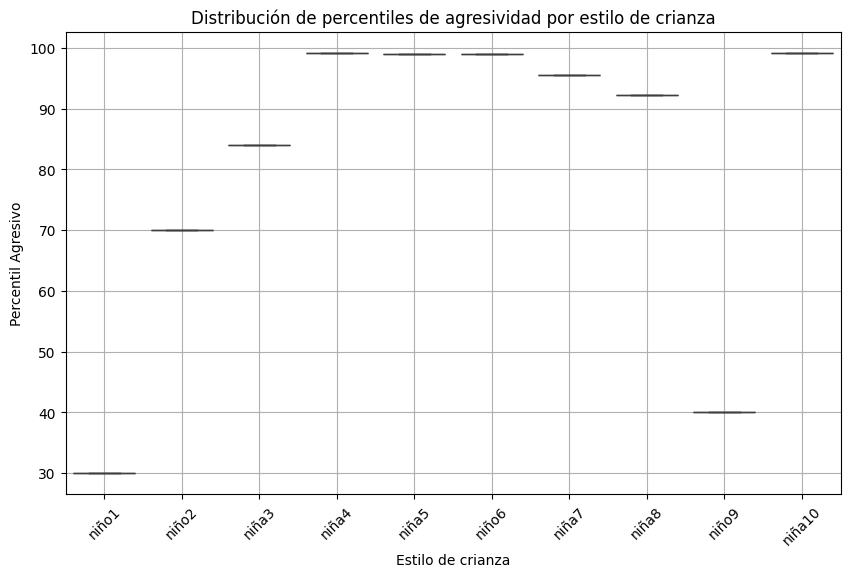

In [54]:



# Supongamos que tienes el DataFrame clasificado_percentiles que contiene los datos como lo has mencionado

# Transponer el DataFrame para tener los estilos de crianza como índices y los niños como columnas
df_transpuesto = clasificado_percentiles.transpose()

# Gráfico de barras para visualizar los percentiles de agresividad para cada estilo de crianza
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_transpuesto, x=df_transpuesto.index, y='Percentil_Agresivo')
plt.title('Distribución de percentiles de agresividad por estilo de crianza')
plt.xlabel('Estilo de crianza')
plt.ylabel('Percentil Agresivo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [56]:
# Calcular el coeficiente de correlación entre el estilo de crianza y la agresividad
correlacion = df_transpuesto['Percentil_Agresivo'].corr(df_transpuesto['Estilo de crianza'])

print(f"Coeficiente de correlación: {correlacion}")

KeyError: 'Estilo de crianza'

In [57]:
print(df_transpuesto.columns)

Index(['Asertivo', 'Pasivo', 'Agresivo', 'Percentil_Asertivo',
       'Percentil_Pasivo', 'Percentil_Agresivo'],
      dtype='object')


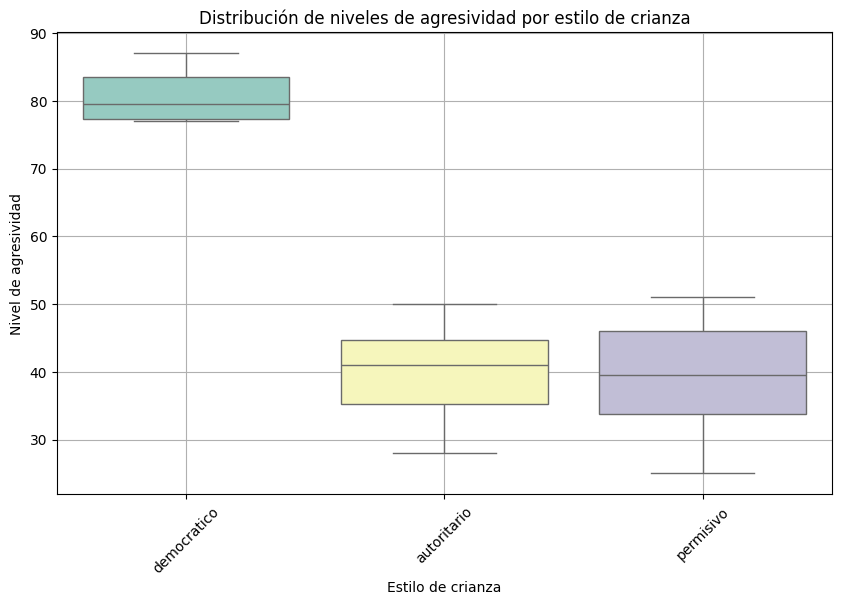

In [59]:

# Transponer el DataFrame para tener los estilos de crianza como índices y los niños como columnas
df_transpuesto = df_crianza.transpose()

# Gráfico de caja para visualizar los niveles de agresividad para cada estilo de crianza
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_transpuesto, palette="Set3")
plt.title('Distribución de niveles de agresividad por estilo de crianza')
plt.xlabel('Estilo de crianza')
plt.ylabel('Nivel de agresividad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Para cada estilo de crianza, generar un gráfico de caja separado
for estilo in estilos_crianza:
    # Filtrar el DataFrame para obtener solo los datos correspondientes al estilo de crianza actual
    df_estilo = df_agresividad[estilo]
    
    # Generar el gráfico de caja para el estilo de crianza actual
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_estilo, color='skyblue')
    plt.title(f'Distribución de agresividad para el estilo de crianza {estilo}')
    plt.xlabel('Niveles de agresividad')
    plt.ylabel('Estilo de crianza')
    plt.grid(True)
    plt.show()

In [66]:

# Estilos de crianza
estilos_crianza = ['democratico', 'autoritario', 'permisivo']

# Iterar sobre los estilos de crianza
for estilo in estilos_crianza:
    # Obtener los valores del percentil de agresividad para el estilo de crianza actual
    percentiles_agresividad = df_agresividad['Percentil_Agresivo'].loc[estilo]
    
    # Obtener los valores del estilo de crianza actual
    valores_estilo_crianza = df_crianza.loc[estilo]
    
    # Crear un gráfico de dispersión
    plt.figure(figsize=(8, 6))
    plt.scatter(valores_estilo_crianza, percentiles_agresividad, color='skyblue')
    plt.title(f'Relación entre Percentil de Agresividad y Estilo de Crianza para {estilo}')
    plt.xlabel('Valor de Estilo de Crianza')
    plt.ylabel('Percentil de Agresividad')
    plt.grid(True)
    plt.show()

NameError: name 'df_agresividad' is not defined

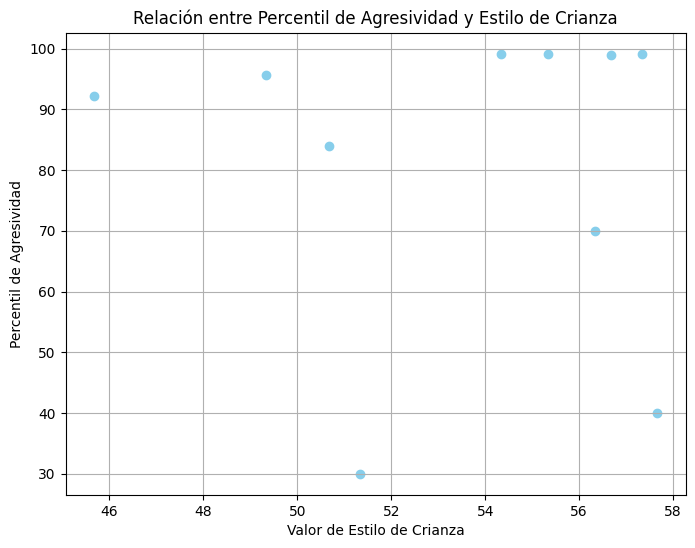

In [74]:

# Transponer el DataFrame de clasificación para facilitar el manejo
df_clasificado_transpuesto = df_clasificado.transpose()


# Seleccionar los valores del estilo de crianza
valores_estilo_crianza = df_crianza.mean()

# Seleccionar los percentiles de agresividad
percentiles_agresividad = df_clasificado.loc['Percentil_Agresivo']

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(valores_estilo_crianza, percentiles_agresividad, color='skyblue')
plt.title('Relación entre Percentil de Agresividad y Estilo de Crianza')
plt.xlabel('Valor de Estilo de Crianza')
plt.ylabel('Percentil de Agresividad')
plt.grid(True)
plt.show()

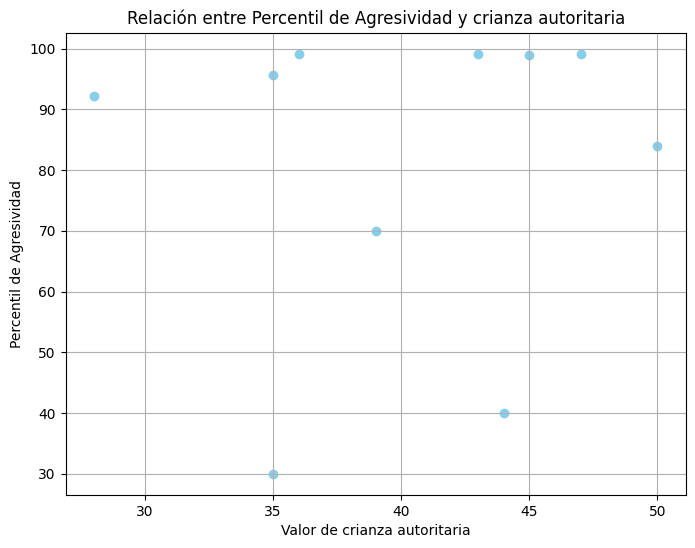

In [78]:
df_crianza_transpuesto = df_crianza.transpose()

# Seleccionar los valores del estilo de crianza
valores_estilo_crianza = df_crianza_transpuesto.autoritario

# Seleccionar los percentiles de agresividad
percentiles_agresividad = df_clasificado.loc['Percentil_Agresivo']

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(valores_estilo_crianza, percentiles_agresividad, color='skyblue')
plt.title('Relación entre Percentil de Agresividad y crianza autoritaria')
plt.xlabel('Valor de crianza autoritaria')
plt.ylabel('Percentil de Agresividad')
plt.grid(True)
plt.show()

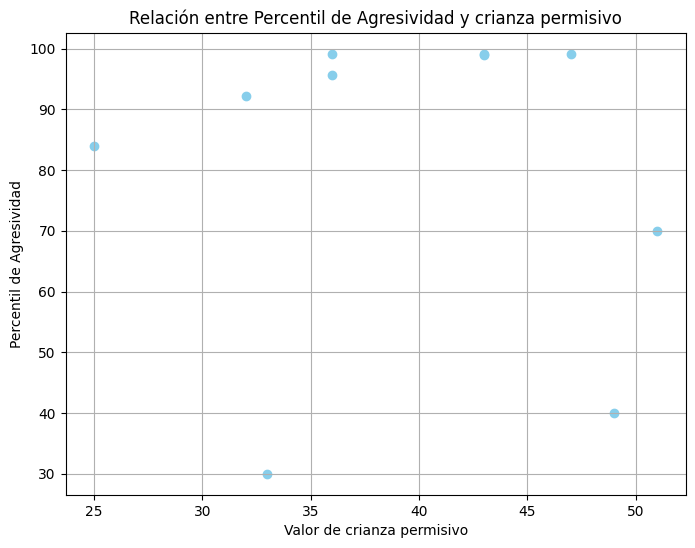

In [79]:
df_crianza_transpuesto = df_crianza.transpose()

# Seleccionar los valores del estilo de crianza
valores_estilo_crianza = df_crianza_transpuesto.permisivo

# Seleccionar los percentiles de agresividad
percentiles_agresividad = df_clasificado.loc['Percentil_Agresivo']

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(valores_estilo_crianza, percentiles_agresividad, color='skyblue')
plt.title('Relación entre Percentil de Agresividad y crianza permisivo')
plt.xlabel('Valor de crianza permisivo')
plt.ylabel('Percentil de Agresividad')
plt.grid(True)
plt.show()

In [ ]:
df_crianza_transpuesto = df_crianza.transpose()

# Seleccionar los valores del estilo de crianza
valores_estilo_crianza = df_crianza_transpuesto.democratico

# Seleccionar los percentiles de agresividad
percentiles_agresividad = df_clasificado.loc['Percentil_Agresivo']

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(valores_estilo_crianza, percentiles_agresividad, color='skyblue')
plt.title('Relación entre Percentil de Agresividad y crianza Democrática')
plt.xlabel('Valor de crianza Democrática')
plt.ylabel('Percentil de Agresividad')
plt.grid(True)
plt.show()